In [25]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# Define Time Period and Parameters

In [26]:
START_DATE = dt.datetime(1970,1,1)
END_DATE = dt.datetime(2020,12,31)
T = 252

# Define Asset Allocation

In [27]:
fixed_asset_allocation = {'Four Seasons': {'assets': ['VTI', 'TLT', 'IEF', 'GLD', 'DBC'],
                                         'weights': np.array([0.3, 0.4, 0.15, 0.075, 0.075])},
                          'All Weather': {'assets': ['VT', 'LTPZ', 'EDV', 'VCLT', 'EMLC', 'IAU', 'BCI'],
                                         'weights': [0.35, 0.2, 0.2, 0.075, 0.075, 0.05, 0.05]},
                         'Sixty Forty': {'assets': ['VTI', 'BND'],
                                        'weights': np.array([0.6, 0.4])},
                         'Permanent': {'assets': ['VTI', 'IEF', 'TLT', 'GLD'],
                                      'weights': np.array([0.25, 0.25, 0.25, 0.25])},
                         'SPY (Benchmark)': {'assets': ['SPY'],
                                      'weights': np.array([1])},
                         'Custom Portfolio': {'assets': ['SPY', 'VT', 'TLT', 'GLD'],
                                             'weights': np.array([0.25, 0.25, 0.25, 0.25])}}

# Get Price Data

In [28]:
combined = []

for portfolio in fixed_asset_allocation.keys():
    combined = combined + fixed_asset_allocation[portfolio]['assets']

combined_assets = list(set(combined))
combined_assets

['BCI',
 'SPY',
 'GLD',
 'TLT',
 'LTPZ',
 'IAU',
 'BND',
 'IEF',
 'VTI',
 'VCLT',
 'DBC',
 'EMLC',
 'EDV',
 'VT']

In [29]:
prices = pd.DataFrame()
for asset in combined_assets:
    prices[asset] = web.DataReader(asset, 'yahoo', START_DATE, END_DATE)['Adj Close']
prices.dropna(inplace=True)

In [30]:
prices

,BCI,SPY,GLD,TLT,LTPZ,IAU,BND,IEF,VTI,VCLT,DBC,EMLC,EDV,VT
Date,,,,,,,,,,,,,,
2017-03-31,23.018423,219.584671,118.720001,110.793884,60.580570,12.010000,72.802872,98.458885,113.183983,77.208931,14.778238,29.639936,96.444420,59.825504
2017-04-03,23.018423,219.202774,119.349998,111.911415,60.964760,12.070000,73.067429,98.943573,112.904106,77.748428,14.719940,29.623854,97.763313,59.770462
2017-04-04,22.966002,219.342484,119.620003,111.304359,60.726929,12.090000,72.986435,98.803497,112.960091,77.455406,14.865684,29.688179,97.103859,59.807152
2017-04-05,23.078196,218.690460,119.620003,111.644684,61.074501,12.100000,73.049400,98.990265,112.502930,77.636406,14.894831,29.672100,97.433601,59.577831
2017-04-06,23.137974,219.305222,119.180000,111.479103,60.973896,12.050000,73.076393,98.924866,112.857452,77.619171,14.933696,29.639933,97.147263,59.669563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,21.639999,369.000000,176.350006,157.289993,88.059998,17.920000,88.010002,119.800003,192.820007,110.800003,14.600000,33.091038,152.080002,91.589996
2020-12-28,21.370001,372.170013,175.710007,157.360001,88.139999,17.870001,87.980003,119.809998,194.039993,110.730003,14.510000,33.100998,152.039993,92.010002
2020-12-29,21.480000,371.459991,176.350006,157.160004,88.000000,17.910000,88.010002,119.790001,193.229996,110.800003,14.550000,33.139999,151.759995,92.190002


# Portfolio Performance Analysis

In [31]:
#portfolios = ['All Weather', 'Sixty Forty', 'Permanent', 'SPY (Benchmark)']

stats_summary = pd.DataFrame(columns = ['Portfolio', 'CAGR (%)', 'MDD (%)', 'CAGR / MDD'])
combined_cumulatives = pd.DataFrame()
for portfolio in fixed_asset_allocation.keys():
    
    port_data = pd.DataFrame()
    
    # get corresponding price data
    for column in prices.columns:
        if column in fixed_asset_allocation[portfolio]['assets']:
            port_data[column] = prices[column]
    
    # compute daily returns of individual assets
    daily_returns = port_data.pct_change()
    
    # compute daily returns of the portfolio    
    daily_returns[portfolio] = daily_returns.dot(fixed_asset_allocation[portfolio]['weights'])
    
    # compute cumulative returns
    cumulative_returns = (1 + daily_returns).cumprod()
    cumulative_returns.fillna(1, inplace=True)
    
    # save cumulative returns of the portfolio for comparison
    
    if portfolio == 'All Weather':
        allWeather = cumulative_returns
    
    if portfolio == 'Sixty Forty':
        sixtyForty = cumulative_returns
    
    if portfolio == 'Permanent':
        permanent = cumulative_returns
    
    combined_cumulatives[portfolio] = cumulative_returns[portfolio]
    
    
    # compute CAGR
    cagr = cumulative_returns**(T/len(cumulative_returns.index)) - 1
    portfolio_cagr = cagr.loc[cagr.index[-1], portfolio]

    # compute MDD
    cumulative_returns = cumulative_returns[portfolio]
    previous_peaks = cumulative_returns.cummax()
    drawdown = (cumulative_returns - previous_peaks) / previous_peaks
    #drawdown.plot()
    portfolio_mdd = drawdown.min()
    
    # save CAGR and MDD for each portfolio
    
    stats_summary = stats_summary.append({'Portfolio': portfolio,
                                         'CAGR (%)': portfolio_cagr * 100,
                                         'MDD (%)': portfolio_mdd* 100,
                                         'CAGR / MDD': abs(portfolio_cagr / portfolio_mdd).round(2)}, ignore_index=True)   

Text(0.5, 1.0, 'Portfolio Performance Comparison')

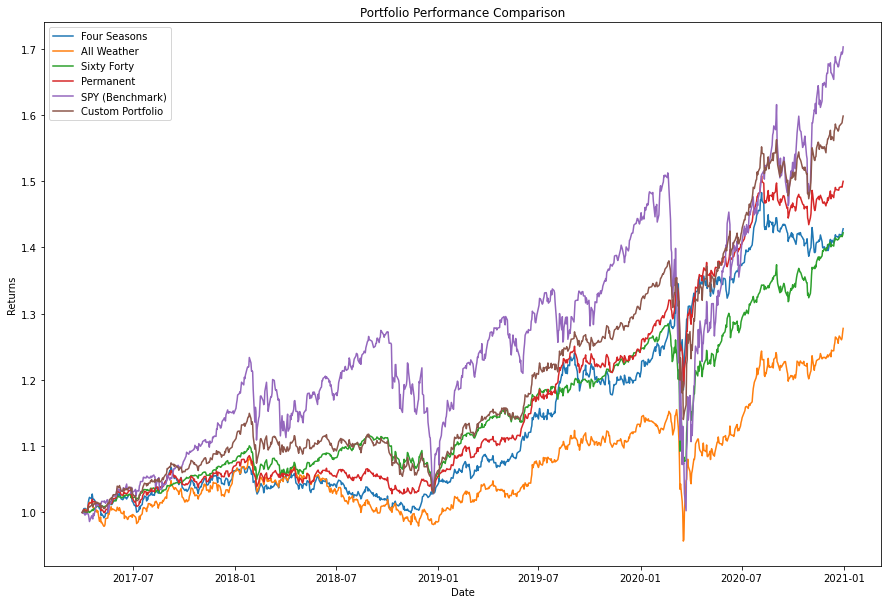

In [32]:
plt.figure(figsize=(15,10))
plt.plot(combined_cumulatives)
plt.legend(combined_cumulatives.columns)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Portfolio Performance Comparison')

In [33]:
stats_summary.set_index('Portfolio', inplace=True)
stats_summary.sort_values('CAGR / MDD', ascending=False)

,CAGR (%),MDD (%),CAGR / MDD
Portfolio,,,
Permanent,11.401079,-11.766578,0.97
Four Seasons,9.959026,-11.918446,0.84
Custom Portfolio,13.305903,-17.358384,0.77
Sixty Forty,9.834370,-16.170462,0.61
SPY (Benchmark),15.231064,-33.717258,0.45
All Weather,6.748529,-17.167539,0.39


Text(0.5, 1.0, 'All Weather Portfolio')

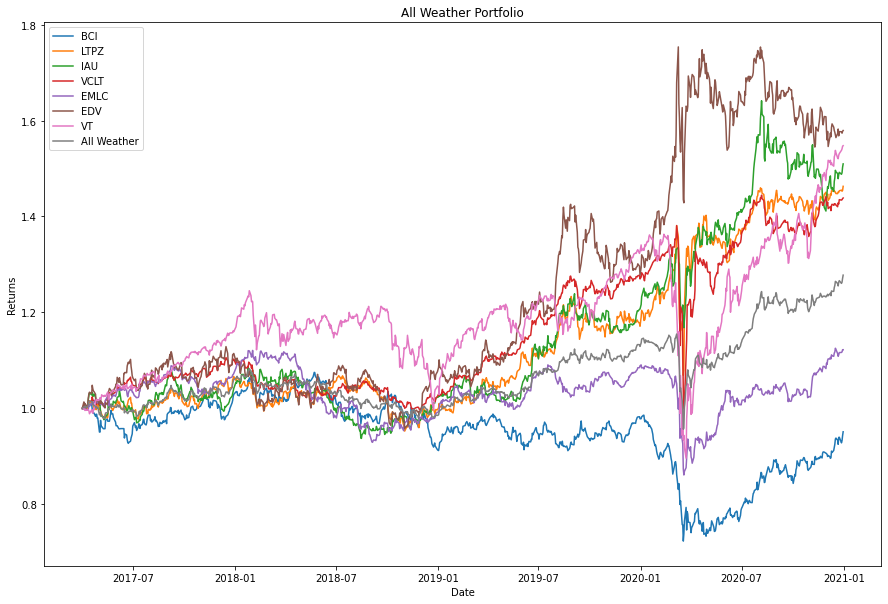

In [34]:

plt.figure(figsize=(15,10))
plt.plot(allWeather)
plt.legend(allWeather.columns)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('All Weather Portfolio')


Text(0.5, 1.0, 'Permanent Portfolio')

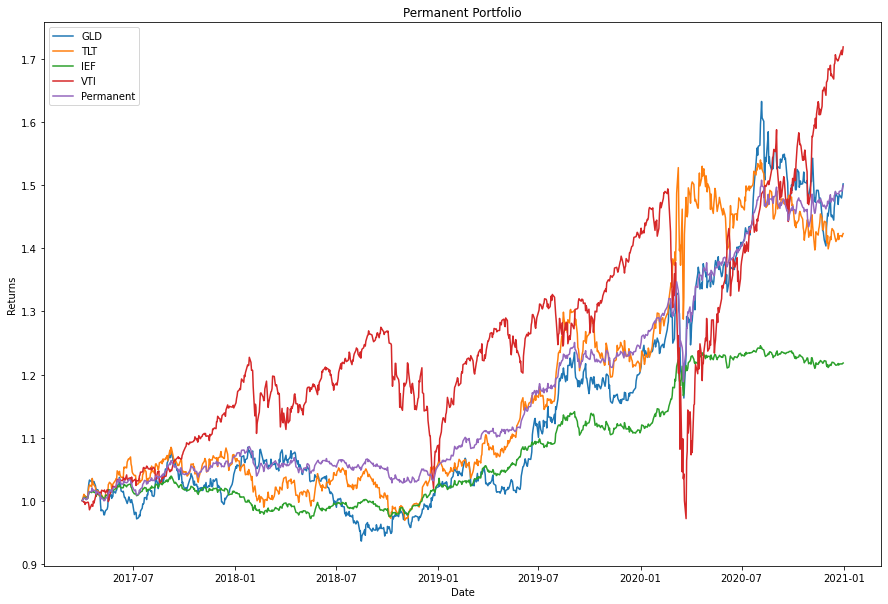

In [35]:
plt.figure(figsize=(15,10))
plt.plot(permanent)
plt.legend(permanent.columns)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Permanent Portfolio')

Text(0.5, 1.0, '60% Equity 40% Bond Portfolio')

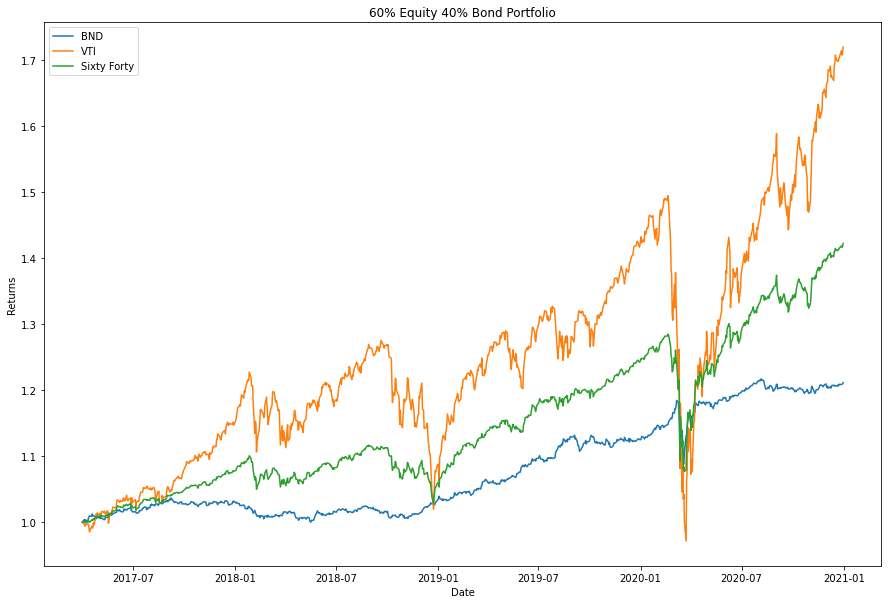

In [36]:
plt.figure(figsize=(15,10))
plt.plot(sixtyForty)
plt.legend(sixtyForty.columns)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('60% Equity 40% Bond Portfolio')